(2/2) Creating Thicket: 100%|██████████| 251/251 [00:09<00:00, 25.18it/s]


Columns in dataframe: Index(['profile', 'nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'Calls/rank (min)', 'Calls/rank (avg)',
       'Calls/rank (max)', 'Calls/rank (total)', 'name'],
      dtype='object')


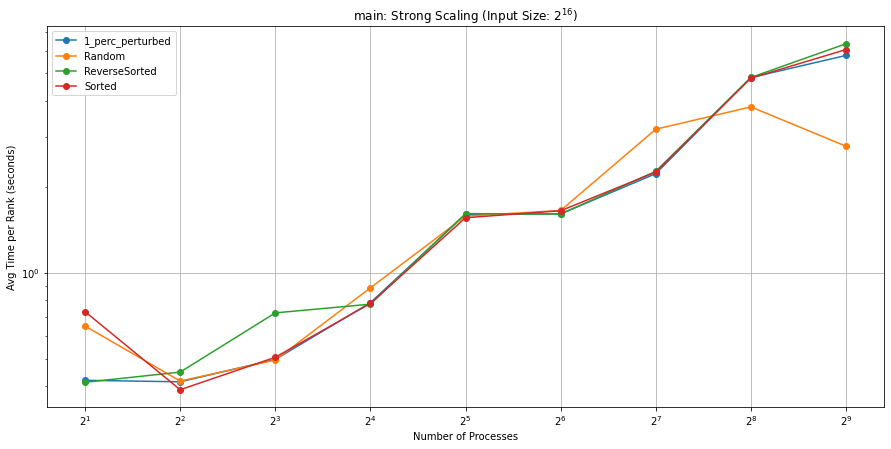

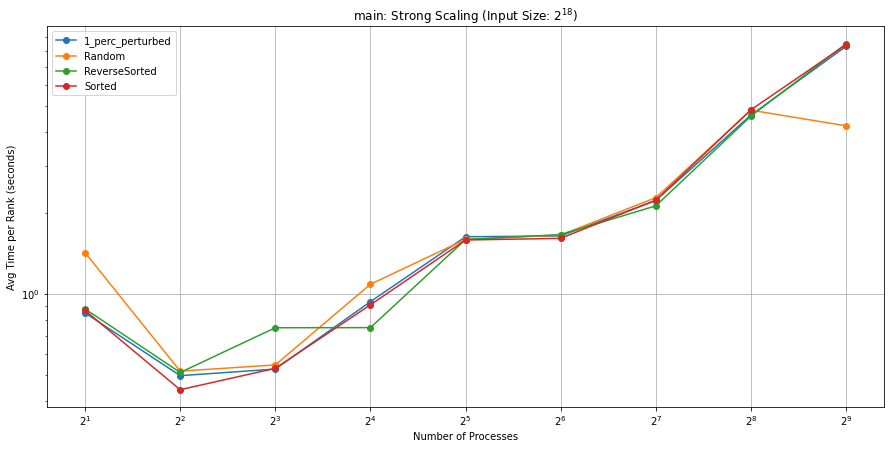

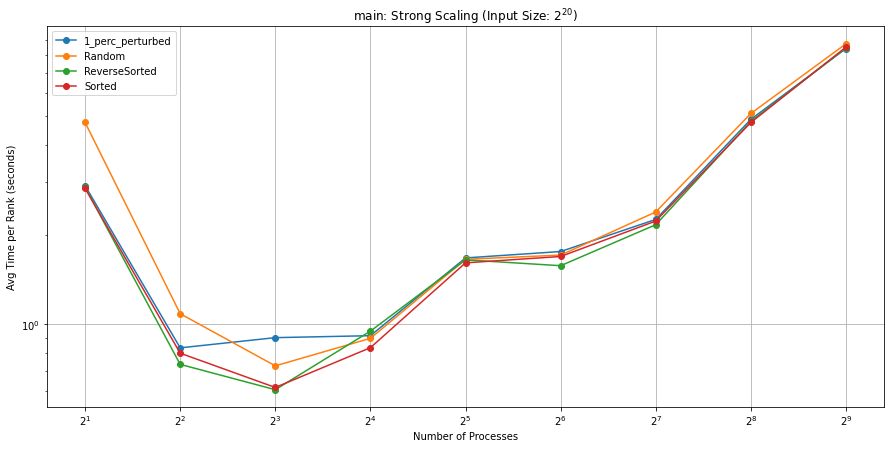

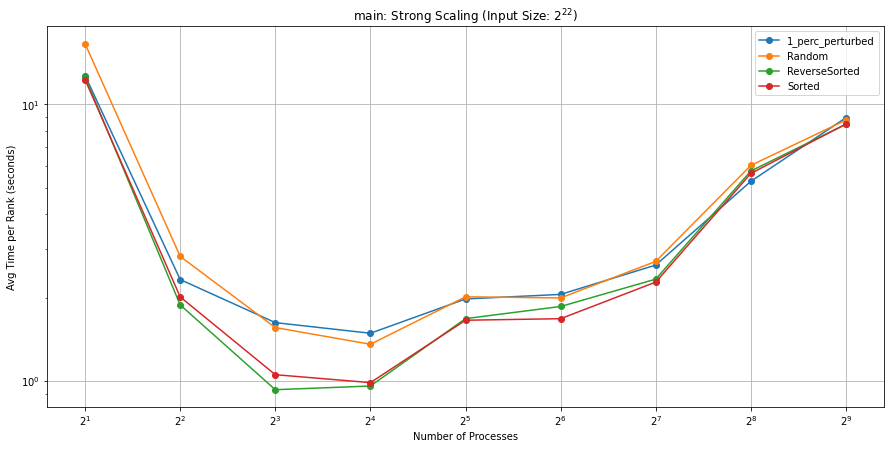

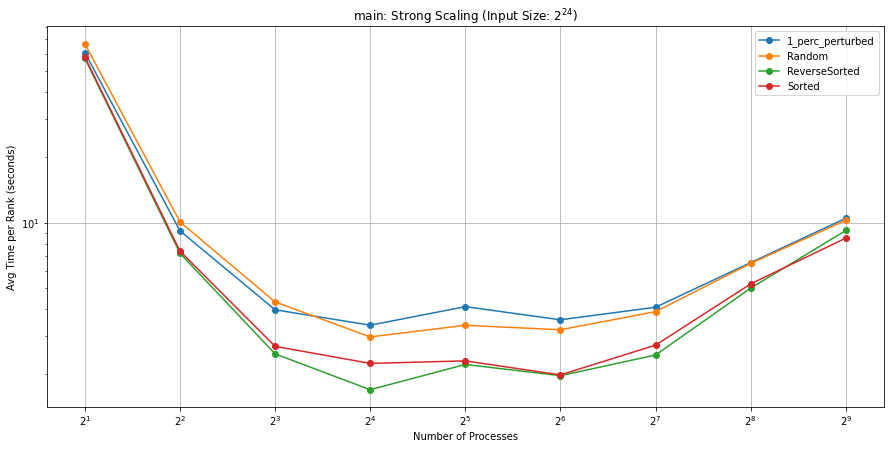

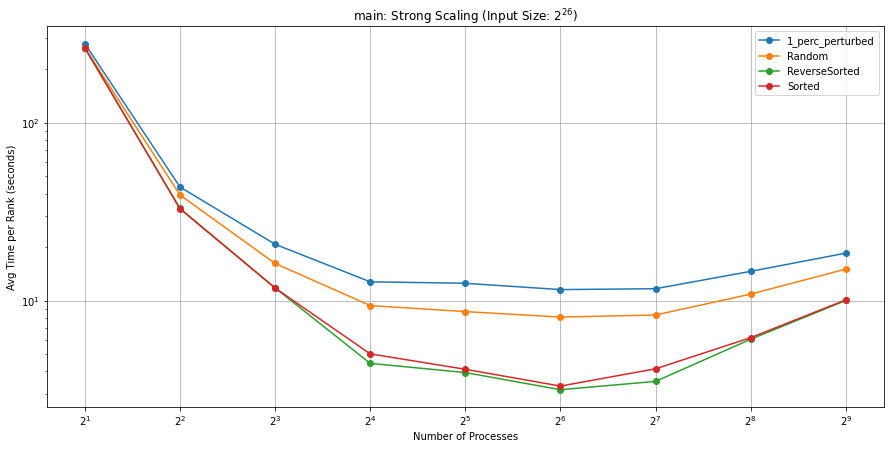

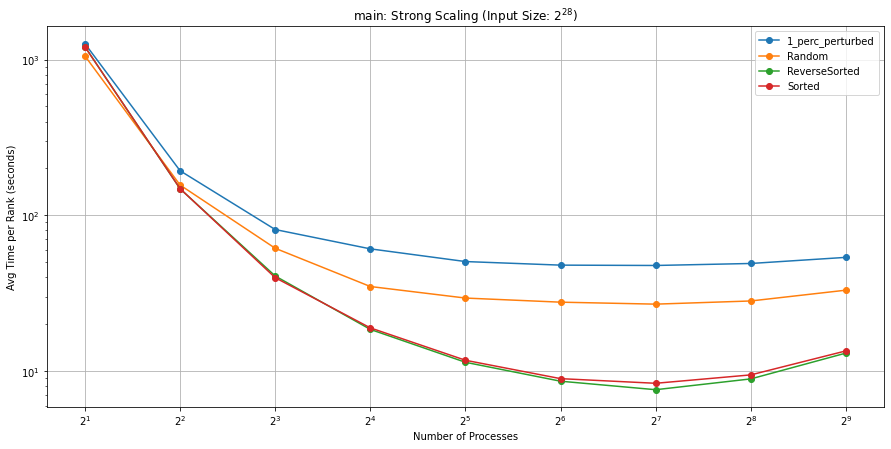

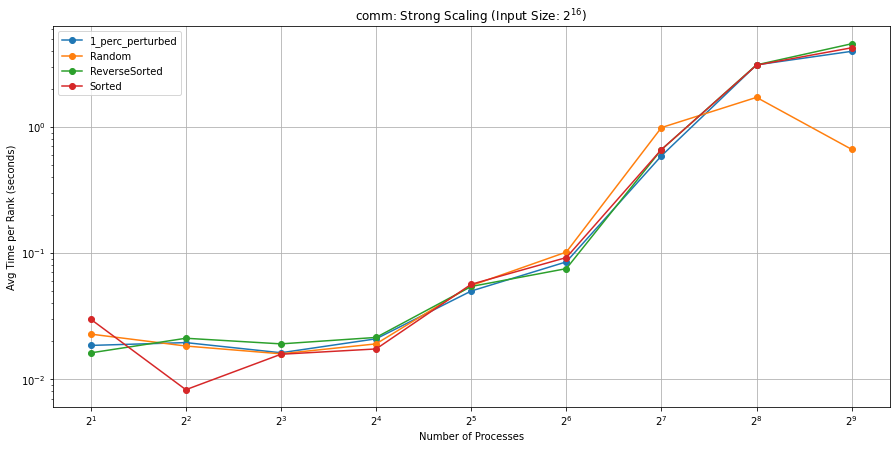

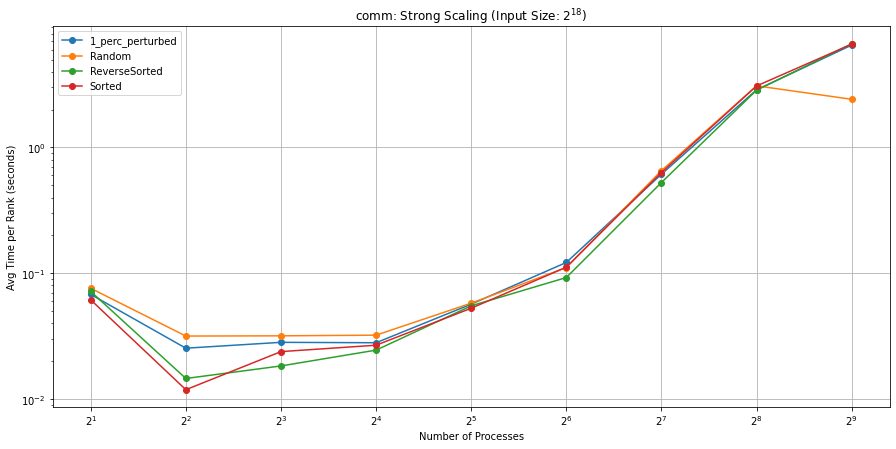

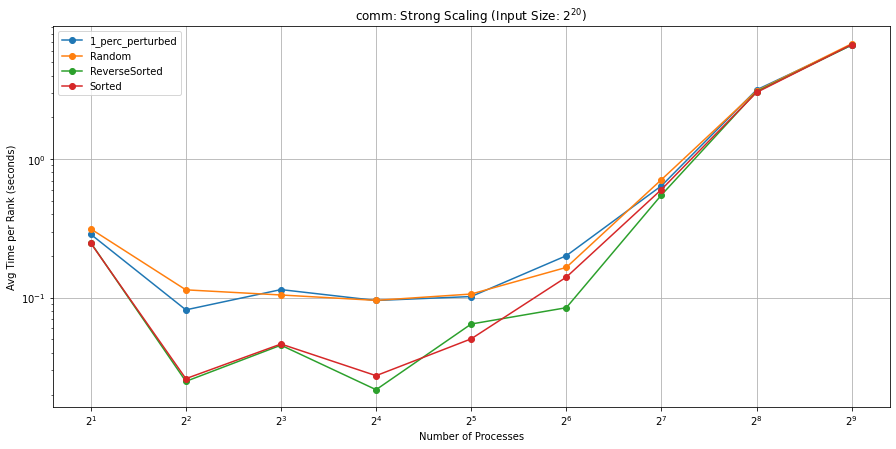

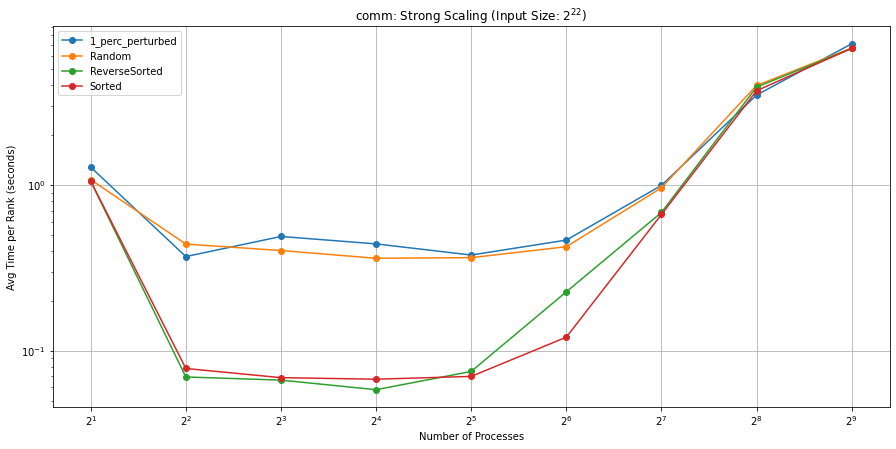

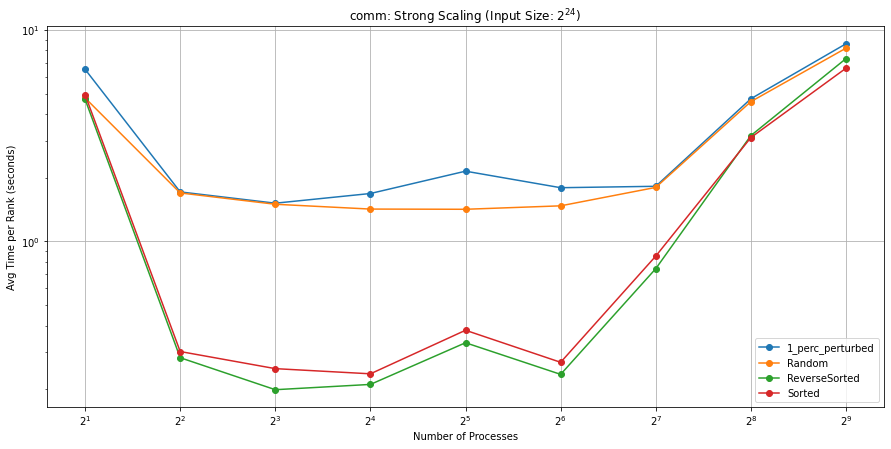

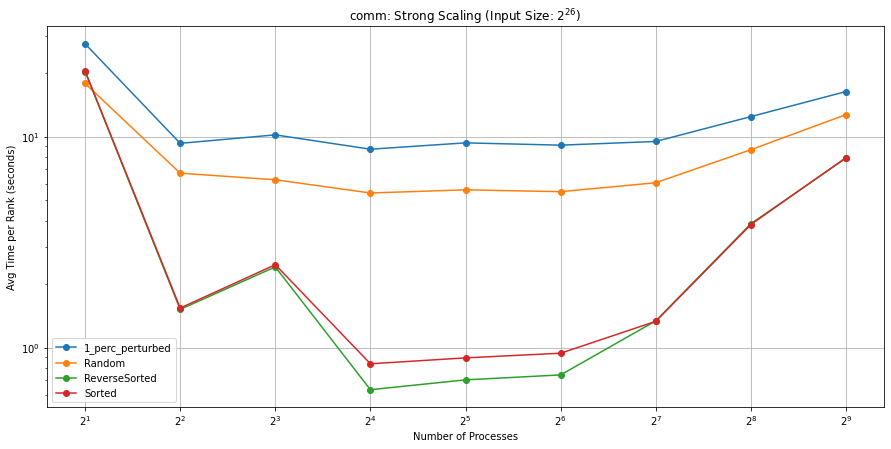

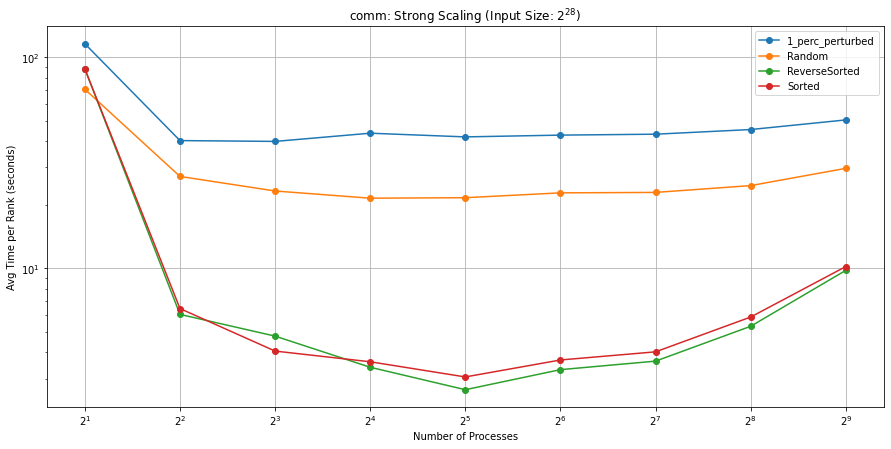

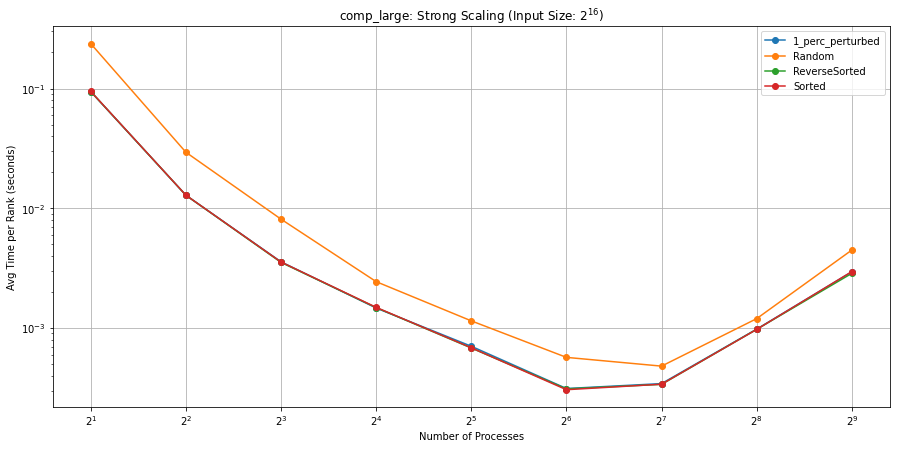

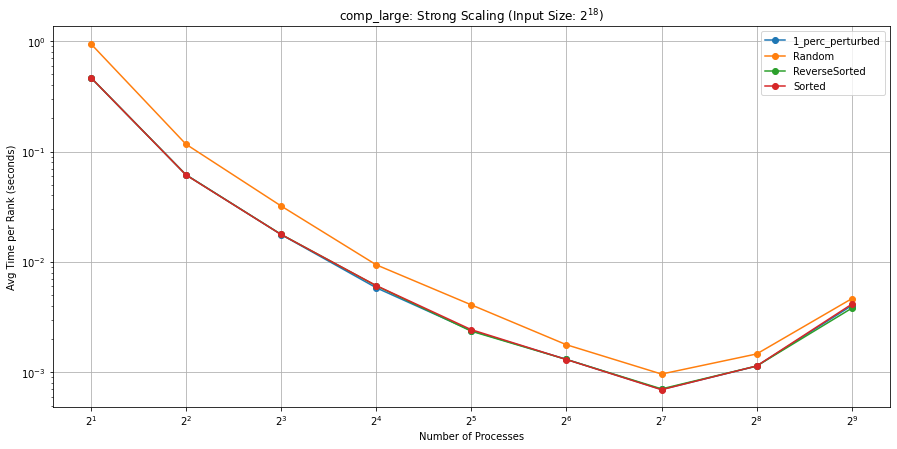

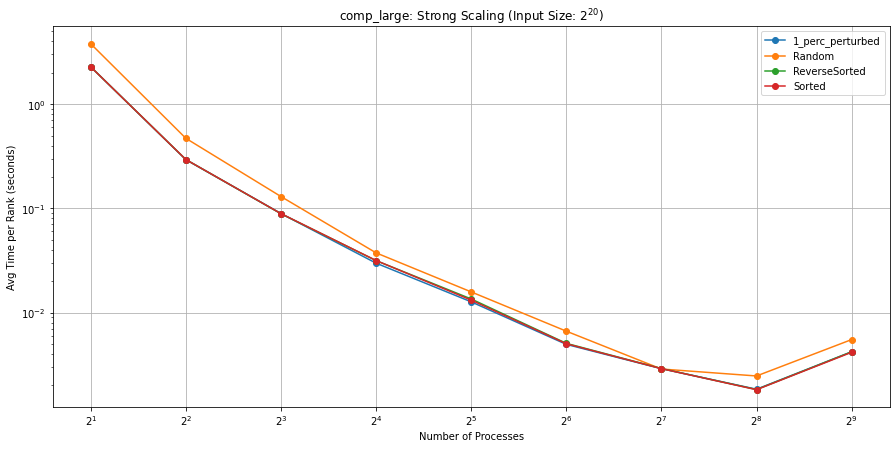

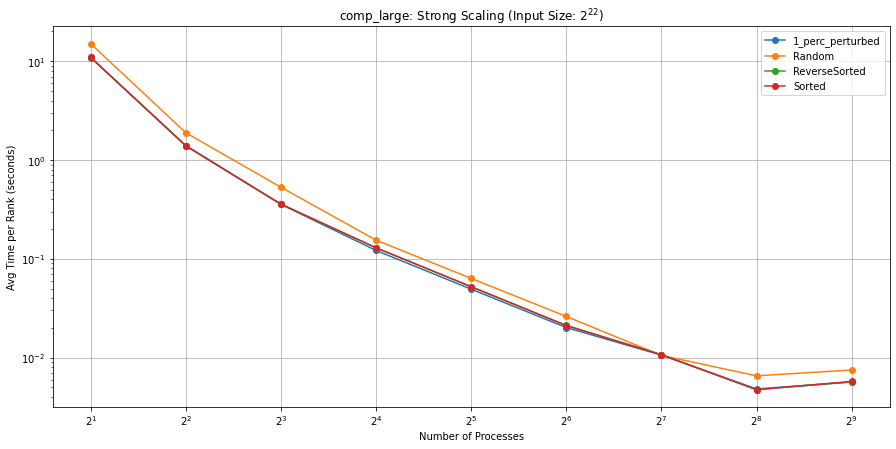

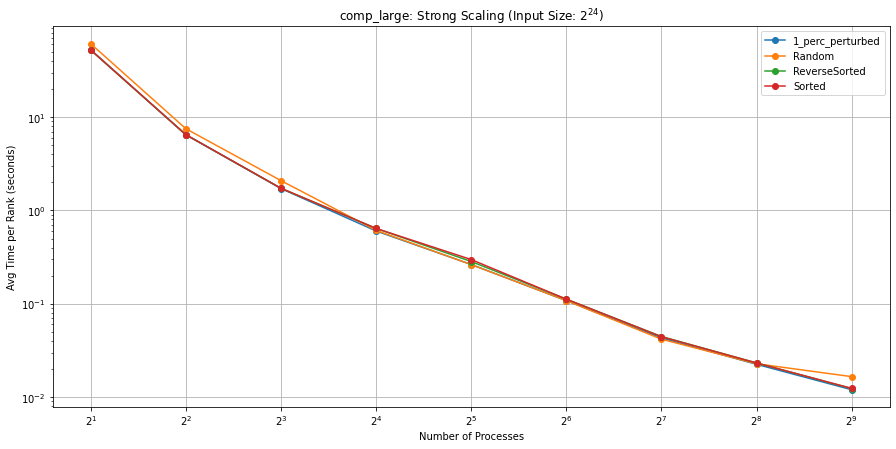

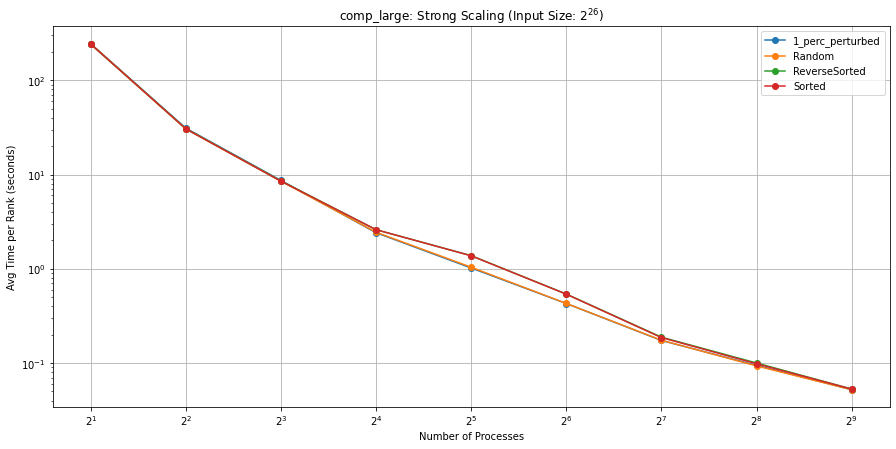

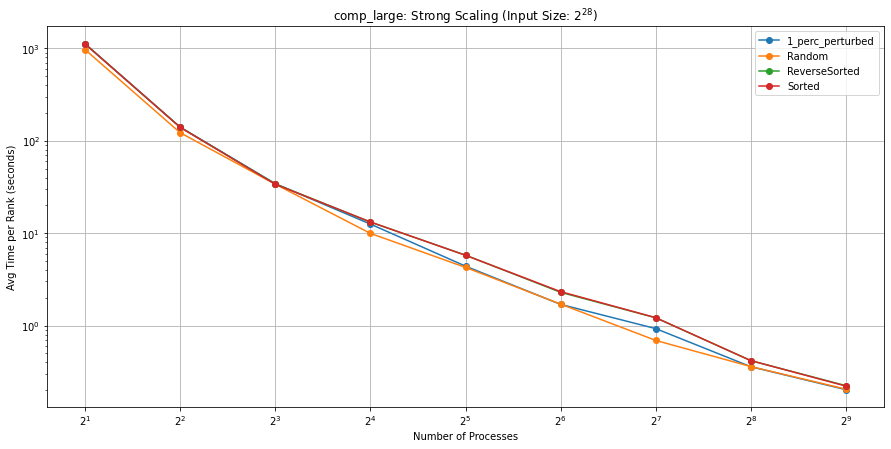

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

tk = th.Thicket.from_caliperreader(glob("*.cali"))
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()
# Print the dataframe columns to check for input_type, input_size, and num_procs
print("Columns in dataframe:", tk.dataframe.columns)
# Print the head of the dataframe to verify structure

def plot_strong_scaling(df, input_size, title):
    plt.figure(figsize=(15, 7))
    
    for input_type in df.index.get_level_values('input_type').unique():
        subset = df.xs((input_size, input_type), level=('input_size', 'input_type'), drop_level=False)

        # Filter out non-positive values for plotting
        subset = subset[subset['Avg time/rank'] > 0]
        
        if not subset.empty:
            plt.plot(subset.index.get_level_values('num_procs'), subset['Avg time/rank'], label=f'{input_type}', marker='o')
    
    if pd.notna(input_size):
        input_size_str = f"$2^{{{int(np.log2(input_size))}}}$"
    else:
        input_size_str = "Unknown Size"

    plt.title(f"{title}: Strong Scaling (Input Size: {input_size_str})")
    plt.xlabel('Number of Processes')
    plt.ylabel('Avg Time per Rank (seconds)')
    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Example of plotting for a specific function and implementation
for node in tk.graph.traverse():
    if node.frame['name'] == 'comp_large' or node.frame['name'] == 'comm' or node.frame['name'] == 'main':
        input_sizes = tk.dataframe.loc[node].index.get_level_values("input_size").unique()
        input_types = tk.dataframe.loc[node].index.get_level_values("input_type").unique()

        # Exclude 'NaN' and 'Random' from input_types
        input_types = [t for t in input_types if pd.notna(t) and t != 'Random']

        # Strong scaling plots for each input size
        for input_size in input_sizes:
            plot_strong_scaling(tk.dataframe.loc[node], input_size, node.frame['name'])

In [2]:
cali_files = glob("*.cali")
tk = th.Thicket.from_caliperreader(cali_files)

tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:09<00:00, 25.21it/s]


Index(['nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'Calls/rank (min)', 'Calls/rank (avg)',
       'Calls/rank (max)', 'Calls/rank (total)', 'name', 'input_size',
       'num_procs', 'input_type'],
      dtype='object')
No data available for input size 65536 with 1024 processors, category 'comm', and data_type 'Sorted'.
No data available for input size 262144 with 1024 processors, category 'comm', and data_type 'Sorted'.
No data available for input size 1048576 with 1024 processors, category 'comm', and data_type 'Sorted'.
No data available for input size 4194304 with 1024 processors, category 'comm', and data_type 'Sorted'.
No data available for input size 16777216 with 1024 processors, category 'comm', and data_type 'Sorted'.
No data available for input size 67108864 with 1024 processors, category 'comm', and da

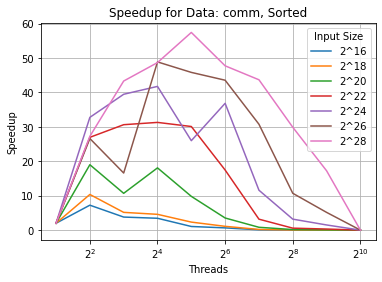

No data available for input size 65536 with 1024 processors, category 'comm', and data_type 'Random'.
No data available for input size 262144 with 1024 processors, category 'comm', and data_type 'Random'.
No data available for input size 1048576 with 1024 processors, category 'comm', and data_type 'Random'.
No data available for input size 4194304 with 1024 processors, category 'comm', and data_type 'Random'.
No data available for input size 16777216 with 1024 processors, category 'comm', and data_type 'Random'.
No data available for input size 67108864 with 1024 processors, category 'comm', and data_type 'Random'.
No data available for input size 268435456 with 1024 processors, category 'comm', and data_type 'Random'.
Plot saved as speedup_plots/speedup_comm_data_type_Random.png


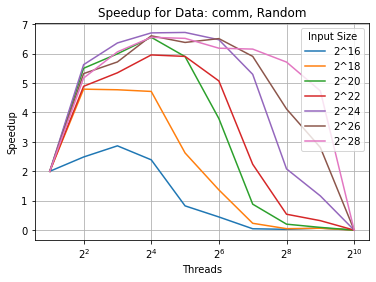

No data available for input size 65536 with 1024 processors, category 'comm', and data_type 'ReverseSorted'.
No data available for input size 262144 with 1024 processors, category 'comm', and data_type 'ReverseSorted'.
No data available for input size 1048576 with 1024 processors, category 'comm', and data_type 'ReverseSorted'.
No data available for input size 4194304 with 1024 processors, category 'comm', and data_type 'ReverseSorted'.
No data available for input size 16777216 with 1024 processors, category 'comm', and data_type 'ReverseSorted'.
No data available for input size 67108864 with 1024 processors, category 'comm', and data_type 'ReverseSorted'.
No data available for input size 268435456 with 1024 processors, category 'comm', and data_type 'ReverseSorted'.
Plot saved as speedup_plots/speedup_comm_data_type_ReverseSorted.png


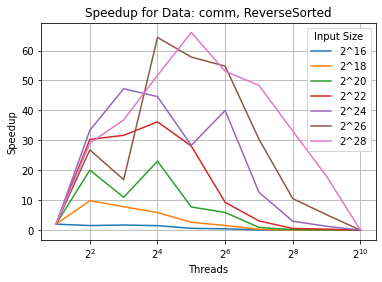

No data available for input size 65536 with 1024 processors, category 'comm', and data_type '1_perc_perturbed'.
No data available for input size 262144 with 1024 processors, category 'comm', and data_type '1_perc_perturbed'.
No data available for input size 1048576 with 1024 processors, category 'comm', and data_type '1_perc_perturbed'.
No data available for input size 4194304 with 1024 processors, category 'comm', and data_type '1_perc_perturbed'.
No data available for input size 16777216 with 1024 processors, category 'comm', and data_type '1_perc_perturbed'.
No data available for input size 67108864 with 1024 processors, category 'comm', and data_type '1_perc_perturbed'.
No data available for input size 268435456 with 1024 processors, category 'comm', and data_type '1_perc_perturbed'.
Plot saved as speedup_plots/speedup_comm_data_type_1_perc_perturbed.png


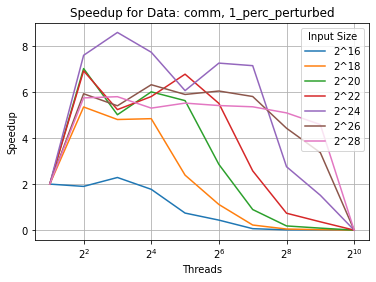

No data available for input size 65536 with 1024 processors, category 'comp', and data_type 'Sorted'.
No data available for input size 262144 with 1024 processors, category 'comp', and data_type 'Sorted'.
No data available for input size 1048576 with 1024 processors, category 'comp', and data_type 'Sorted'.
No data available for input size 4194304 with 1024 processors, category 'comp', and data_type 'Sorted'.
No data available for input size 16777216 with 1024 processors, category 'comp', and data_type 'Sorted'.
No data available for input size 67108864 with 1024 processors, category 'comp', and data_type 'Sorted'.
No data available for input size 268435456 with 1024 processors, category 'comp', and data_type 'Sorted'.
Plot saved as speedup_plots/speedup_comp_data_type_Sorted.png


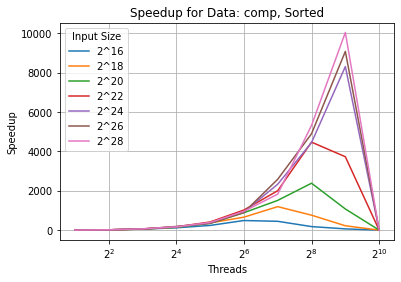

No data available for input size 65536 with 1024 processors, category 'comp', and data_type 'Random'.
No data available for input size 262144 with 1024 processors, category 'comp', and data_type 'Random'.
No data available for input size 1048576 with 1024 processors, category 'comp', and data_type 'Random'.
No data available for input size 4194304 with 1024 processors, category 'comp', and data_type 'Random'.
No data available for input size 16777216 with 1024 processors, category 'comp', and data_type 'Random'.
No data available for input size 67108864 with 1024 processors, category 'comp', and data_type 'Random'.
No data available for input size 268435456 with 1024 processors, category 'comp', and data_type 'Random'.
Plot saved as speedup_plots/speedup_comp_data_type_Random.png


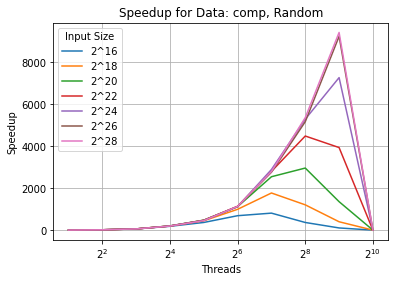

No data available for input size 65536 with 1024 processors, category 'comp', and data_type 'ReverseSorted'.
No data available for input size 262144 with 1024 processors, category 'comp', and data_type 'ReverseSorted'.
No data available for input size 1048576 with 1024 processors, category 'comp', and data_type 'ReverseSorted'.
No data available for input size 4194304 with 1024 processors, category 'comp', and data_type 'ReverseSorted'.
No data available for input size 16777216 with 1024 processors, category 'comp', and data_type 'ReverseSorted'.
No data available for input size 67108864 with 1024 processors, category 'comp', and data_type 'ReverseSorted'.
No data available for input size 268435456 with 1024 processors, category 'comp', and data_type 'ReverseSorted'.
Plot saved as speedup_plots/speedup_comp_data_type_ReverseSorted.png


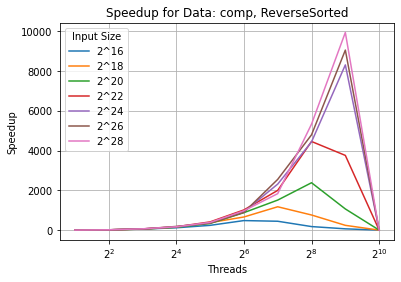

No data available for input size 65536 with 1024 processors, category 'comp', and data_type '1_perc_perturbed'.
No data available for input size 262144 with 1024 processors, category 'comp', and data_type '1_perc_perturbed'.
No data available for input size 1048576 with 1024 processors, category 'comp', and data_type '1_perc_perturbed'.
No data available for input size 4194304 with 1024 processors, category 'comp', and data_type '1_perc_perturbed'.
No data available for input size 16777216 with 1024 processors, category 'comp', and data_type '1_perc_perturbed'.
No data available for input size 67108864 with 1024 processors, category 'comp', and data_type '1_perc_perturbed'.
No data available for input size 268435456 with 1024 processors, category 'comp', and data_type '1_perc_perturbed'.
Plot saved as speedup_plots/speedup_comp_data_type_1_perc_perturbed.png


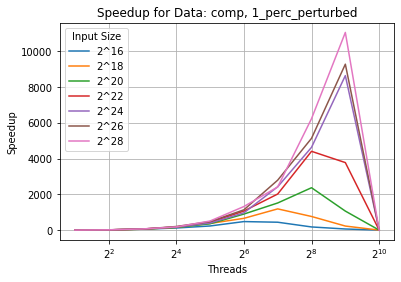

No data available for input size 65536 with 1024 processors, category 'main', and data_type 'Sorted'.
No data available for input size 262144 with 1024 processors, category 'main', and data_type 'Sorted'.
No data available for input size 1048576 with 1024 processors, category 'main', and data_type 'Sorted'.
No data available for input size 4194304 with 1024 processors, category 'main', and data_type 'Sorted'.
No data available for input size 16777216 with 1024 processors, category 'main', and data_type 'Sorted'.
No data available for input size 67108864 with 1024 processors, category 'main', and data_type 'Sorted'.
No data available for input size 268435456 with 1024 processors, category 'main', and data_type 'Sorted'.
Plot saved as speedup_plots/speedup_main_data_type_Sorted.png


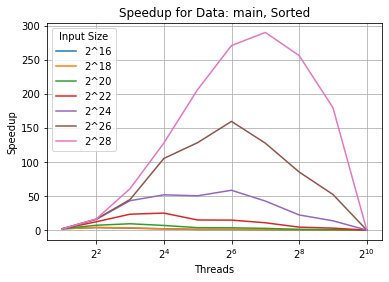

No data available for input size 65536 with 1024 processors, category 'main', and data_type 'Random'.
No data available for input size 262144 with 1024 processors, category 'main', and data_type 'Random'.
No data available for input size 1048576 with 1024 processors, category 'main', and data_type 'Random'.
No data available for input size 4194304 with 1024 processors, category 'main', and data_type 'Random'.
No data available for input size 16777216 with 1024 processors, category 'main', and data_type 'Random'.
No data available for input size 67108864 with 1024 processors, category 'main', and data_type 'Random'.
No data available for input size 268435456 with 1024 processors, category 'main', and data_type 'Random'.
Plot saved as speedup_plots/speedup_main_data_type_Random.png


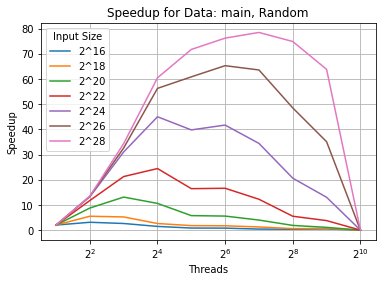

No data available for input size 65536 with 1024 processors, category 'main', and data_type 'ReverseSorted'.
No data available for input size 262144 with 1024 processors, category 'main', and data_type 'ReverseSorted'.
No data available for input size 1048576 with 1024 processors, category 'main', and data_type 'ReverseSorted'.
No data available for input size 4194304 with 1024 processors, category 'main', and data_type 'ReverseSorted'.
No data available for input size 16777216 with 1024 processors, category 'main', and data_type 'ReverseSorted'.
No data available for input size 67108864 with 1024 processors, category 'main', and data_type 'ReverseSorted'.
No data available for input size 268435456 with 1024 processors, category 'main', and data_type 'ReverseSorted'.
Plot saved as speedup_plots/speedup_main_data_type_ReverseSorted.png


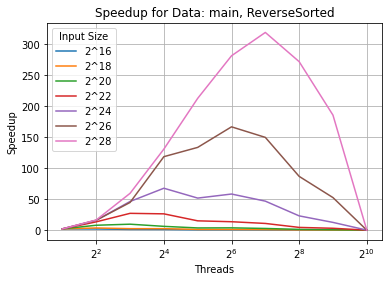

No data available for input size 65536 with 1024 processors, category 'main', and data_type '1_perc_perturbed'.
No data available for input size 262144 with 1024 processors, category 'main', and data_type '1_perc_perturbed'.
No data available for input size 1048576 with 1024 processors, category 'main', and data_type '1_perc_perturbed'.
No data available for input size 4194304 with 1024 processors, category 'main', and data_type '1_perc_perturbed'.
No data available for input size 16777216 with 1024 processors, category 'main', and data_type '1_perc_perturbed'.
No data available for input size 67108864 with 1024 processors, category 'main', and data_type '1_perc_perturbed'.
No data available for input size 268435456 with 1024 processors, category 'main', and data_type '1_perc_perturbed'.
Plot saved as speedup_plots/speedup_main_data_type_1_perc_perturbed.png


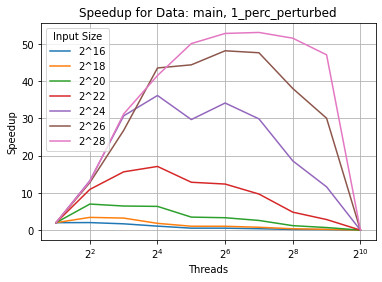

In [3]:
import os

import matplotlib.pyplot as plt



# Create the directory to save plots if it does not exist

output_dir = "speedup_plots"

if not os.path.exists(output_dir):

    os.makedirs(output_dir)


# Define input sizes and thread counts (number of processes)

n_vals = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

thread_counts = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Replace with actual numbers of threads/ranks as needed

legends = ["2^16", "2^18", "2^20", "2^22", "2^24", "2^26", "2^28", "2^30"]  # Legend labels for input sizes

data_types = ['Sorted', 'Random', 'ReverseSorted', '1_perc_perturbed']  # List of data types to filter

categories = ['comm', 'comp', 'main']  # Categories to loop through


print(tk.dataframe.columns)
# Loop through each category and each data type

for category in categories:

    for data_type in data_types:

        plt.figure()  # Create a new figure for each category and data type

        plt.title(f"Speedup for Data: {category}, {data_type}")  # Set the title for the plot



        # Loop through each input size to calculate and plot speedup

        for n_val, label in zip(n_vals, legends):

            # Filter the dataframe by input size, data type, and category

            df_filtered = tk.dataframe[(tk.dataframe['input_size'] == n_val) & 

                                       (tk.dataframe['input_type'] == data_type) & 

                                       (tk.dataframe['name'] == category)]



            # Extract baseline time for 2 threads/processes

            baseline_rows = df_filtered[df_filtered['num_procs'] == 2]

            if baseline_rows.empty:

                print(f"No baseline data available for input size {n_val} with 2 processors, category '{category}', and data_type '{data_type}'.")

                continue



            baseline_time = baseline_rows['Avg time/rank'].values[0]



            # Calculate speedup for each thread count

            speedup_values = []

            for threads in thread_counts:

                # Check if data for this number of threads exists

                thread_row = df_filtered[df_filtered['num_procs'] == threads]

                if not thread_row.empty:

                    time_for_threads = thread_row['Avg time/rank'].values[0]

                    speedup = 2 * baseline_time / time_for_threads

                    speedup_values.append(speedup)

                else:

                    speedup_values.append(0)  # Set missing data to zero-speedup for continuity

                    print(f"No data available for input size {n_val} with {threads} processors, category '{category}', and data_type '{data_type}'.")



            # Plot speedup for current input size only if there are valid values

            if any(speedup_values):

                plt.plot(thread_counts, speedup_values, label=label)

            else:

                print(f"No valid speedup values found for input size {n_val}, category '{category}', data_type '{data_type}'.")



        # Configure plot settings

        plt.xscale("log", base=2)  # Logarithmic scale for thread counts

        plt.xlabel("Threads")

        plt.ylabel("Speedup")

        plt.legend(title="Input Size")

        plt.grid(True)  # Optional: add grid for better visibility



        # Save the plot as an image file in the specified output directory

        filename = f"{output_dir}/speedup_{category}_data_type_{data_type}.png"

        plt.savefig(filename)

        print(f"Plot saved as {filename}")



        # Show plot if needed

        plt.show()



        # Close the plot to save memory

        plt.close()

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:10<00:00, 25.08it/s]


No data available for size 16777216, input type 'Sorted', category 'comm', and threads 1024
No data available for size 4194304, input type 'Sorted', category 'comm', and threads 1024
No data available for size 1048576, input type 'Sorted', category 'comm', and threads 1024
No data available for size 262144, input type 'Sorted', category 'comm', and threads 1024
No base time available for initial size 65536, input type 'Sorted', category 'comm', and threads 1024


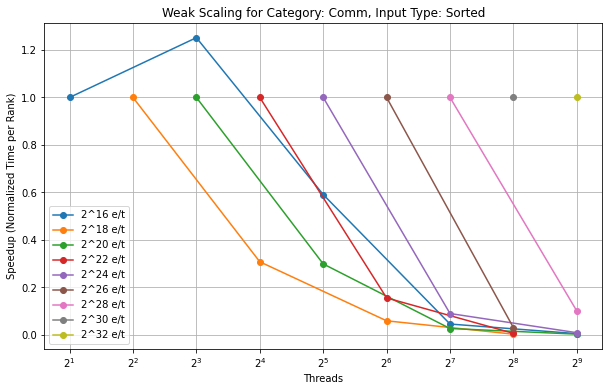

Plot saved to weak_scaling_plots/weak_scaling_comm_sorted.png
No data available for size 16777216, input type 'Random', category 'comm', and threads 1024
No data available for size 4194304, input type 'Random', category 'comm', and threads 1024
No data available for size 1048576, input type 'Random', category 'comm', and threads 1024
No data available for size 262144, input type 'Random', category 'comm', and threads 1024
No base time available for initial size 65536, input type 'Random', category 'comm', and threads 1024


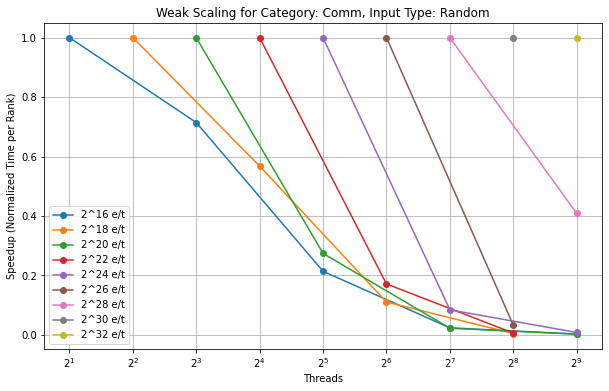

Plot saved to weak_scaling_plots/weak_scaling_comm_random.png
No data available for size 16777216, input type 'ReverseSorted', category 'comm', and threads 1024
No data available for size 4194304, input type 'ReverseSorted', category 'comm', and threads 1024
No data available for size 1048576, input type 'ReverseSorted', category 'comm', and threads 1024
No data available for size 262144, input type 'ReverseSorted', category 'comm', and threads 1024
No base time available for initial size 65536, input type 'ReverseSorted', category 'comm', and threads 1024


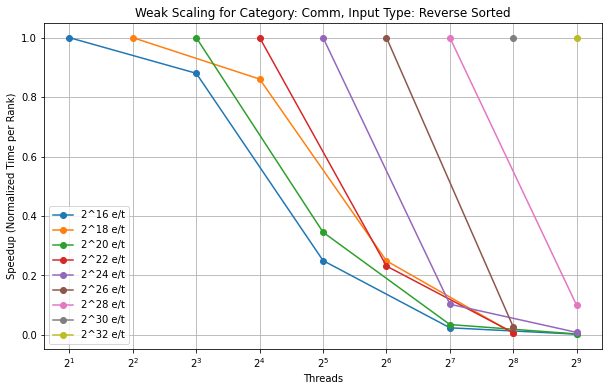

Plot saved to weak_scaling_plots/weak_scaling_comm_reverse_sorted.png
No data available for size 16777216, input type '1_perc_perturbed', category 'comm', and threads 1024
No data available for size 4194304, input type '1_perc_perturbed', category 'comm', and threads 1024
No data available for size 1048576, input type '1_perc_perturbed', category 'comm', and threads 1024
No data available for size 262144, input type '1_perc_perturbed', category 'comm', and threads 1024
No base time available for initial size 65536, input type '1_perc_perturbed', category 'comm', and threads 1024


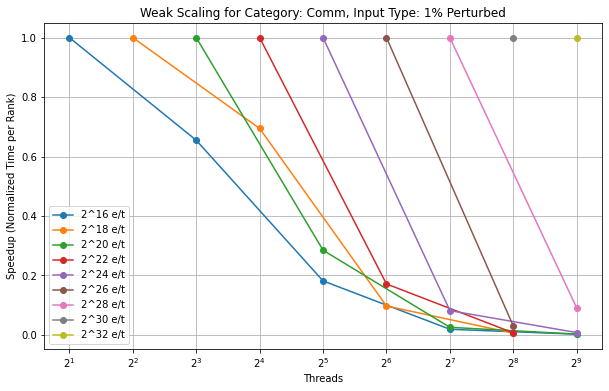

Plot saved to weak_scaling_plots/weak_scaling_comm_1%_perturbed.png
No data available for size 16777216, input type 'Sorted', category 'comp_large', and threads 1024
No data available for size 4194304, input type 'Sorted', category 'comp_large', and threads 1024
No data available for size 1048576, input type 'Sorted', category 'comp_large', and threads 1024
No data available for size 262144, input type 'Sorted', category 'comp_large', and threads 1024
No base time available for initial size 65536, input type 'Sorted', category 'comp_large', and threads 1024


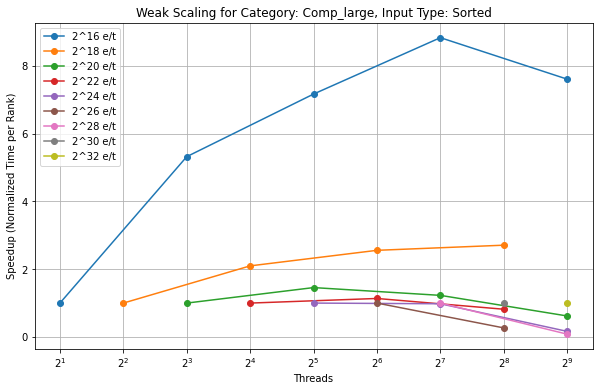

Plot saved to weak_scaling_plots/weak_scaling_comp_large_sorted.png
No data available for size 16777216, input type 'Random', category 'comp_large', and threads 1024
No data available for size 4194304, input type 'Random', category 'comp_large', and threads 1024
No data available for size 1048576, input type 'Random', category 'comp_large', and threads 1024
No data available for size 262144, input type 'Random', category 'comp_large', and threads 1024
No base time available for initial size 65536, input type 'Random', category 'comp_large', and threads 1024


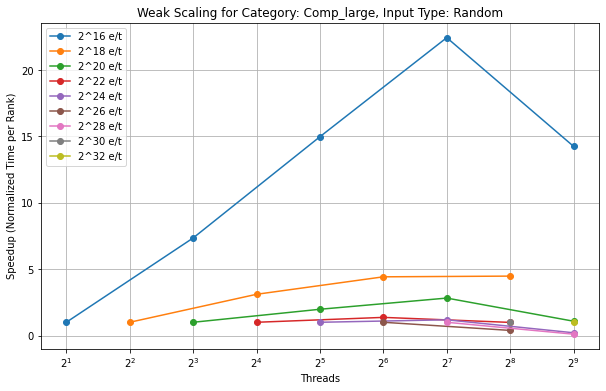

Plot saved to weak_scaling_plots/weak_scaling_comp_large_random.png
No data available for size 16777216, input type 'ReverseSorted', category 'comp_large', and threads 1024
No data available for size 4194304, input type 'ReverseSorted', category 'comp_large', and threads 1024
No data available for size 1048576, input type 'ReverseSorted', category 'comp_large', and threads 1024
No data available for size 262144, input type 'ReverseSorted', category 'comp_large', and threads 1024
No base time available for initial size 65536, input type 'ReverseSorted', category 'comp_large', and threads 1024


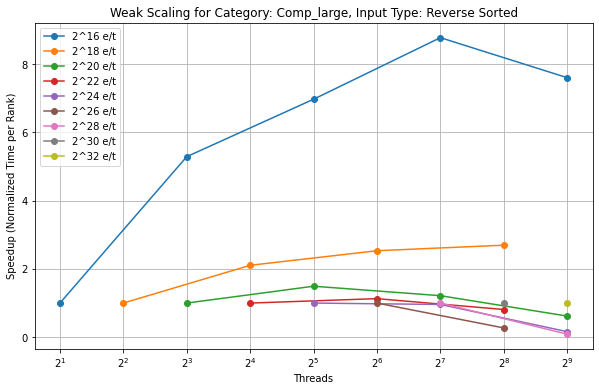

Plot saved to weak_scaling_plots/weak_scaling_comp_large_reverse_sorted.png
No data available for size 16777216, input type '1_perc_perturbed', category 'comp_large', and threads 1024
No data available for size 4194304, input type '1_perc_perturbed', category 'comp_large', and threads 1024
No data available for size 1048576, input type '1_perc_perturbed', category 'comp_large', and threads 1024
No data available for size 262144, input type '1_perc_perturbed', category 'comp_large', and threads 1024
No base time available for initial size 65536, input type '1_perc_perturbed', category 'comp_large', and threads 1024


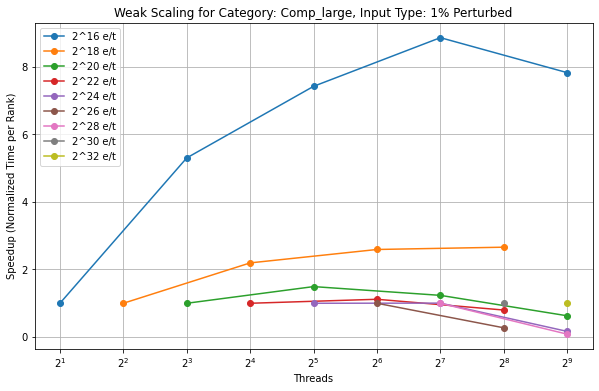

Plot saved to weak_scaling_plots/weak_scaling_comp_large_1%_perturbed.png
No data available for size 16777216, input type 'Sorted', category 'main', and threads 1024
No data available for size 4194304, input type 'Sorted', category 'main', and threads 1024
No data available for size 1048576, input type 'Sorted', category 'main', and threads 1024
No data available for size 262144, input type 'Sorted', category 'main', and threads 1024
No base time available for initial size 65536, input type 'Sorted', category 'main', and threads 1024


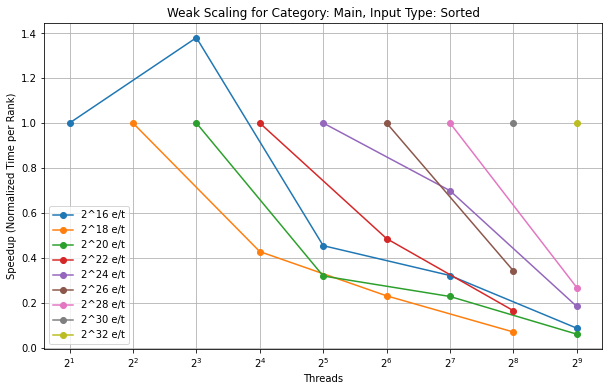

Plot saved to weak_scaling_plots/weak_scaling_main_sorted.png
No data available for size 16777216, input type 'Random', category 'main', and threads 1024
No data available for size 4194304, input type 'Random', category 'main', and threads 1024
No data available for size 1048576, input type 'Random', category 'main', and threads 1024
No data available for size 262144, input type 'Random', category 'main', and threads 1024
No base time available for initial size 65536, input type 'Random', category 'main', and threads 1024


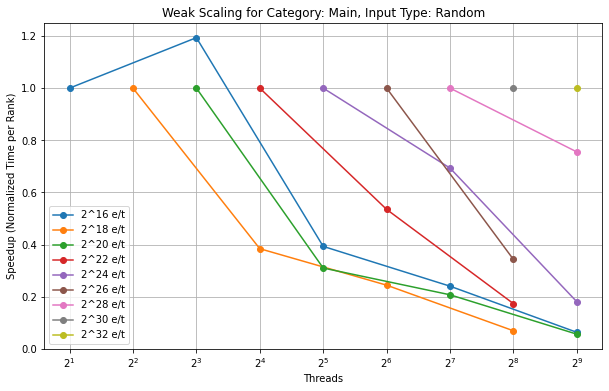

Plot saved to weak_scaling_plots/weak_scaling_main_random.png
No data available for size 16777216, input type 'ReverseSorted', category 'main', and threads 1024
No data available for size 4194304, input type 'ReverseSorted', category 'main', and threads 1024
No data available for size 1048576, input type 'ReverseSorted', category 'main', and threads 1024
No data available for size 262144, input type 'ReverseSorted', category 'main', and threads 1024
No base time available for initial size 65536, input type 'ReverseSorted', category 'main', and threads 1024


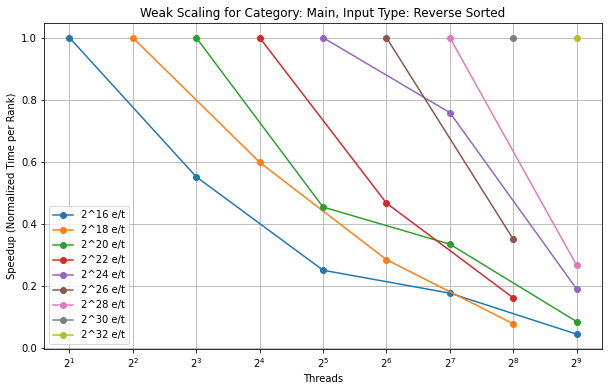

Plot saved to weak_scaling_plots/weak_scaling_main_reverse_sorted.png
No data available for size 16777216, input type '1_perc_perturbed', category 'main', and threads 1024
No data available for size 4194304, input type '1_perc_perturbed', category 'main', and threads 1024
No data available for size 1048576, input type '1_perc_perturbed', category 'main', and threads 1024
No data available for size 262144, input type '1_perc_perturbed', category 'main', and threads 1024
No base time available for initial size 65536, input type '1_perc_perturbed', category 'main', and threads 1024


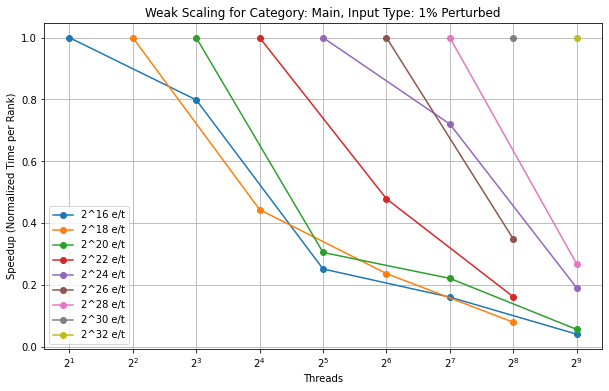

Plot saved to weak_scaling_plots/weak_scaling_main_1%_perturbed.png


In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import os

cali_files = glob("*.cali")
tk = th.Thicket.from_caliperreader(cali_files)

tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")

# Create the directory to save plots if it doesn't exist

output_dir = "weak_scaling_plots"

if not os.path.exists(output_dir):

    os.makedirs(output_dir)



# MPI Only

# For Weak Scaling



def calculate_weak_scaling(tk, input_type, category, initial_size=65536, max_threads=1024):

    times = []

    l = []



    # List of starting thread counts

    starting_threads = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]



    # Loop through each starting thread count

    for threads in starting_threads:

        time = []

        thread_l = []



        size = initial_size

        current_threads = threads



        # Filter the dataframe for the required initial size, input type, and category

        base_df = tk.dataframe[(tk.dataframe['input_size'] == initial_size) &

                               (tk.dataframe['input_type'] == input_type) &

                               (tk.dataframe['name'] == category) &

                               (tk.dataframe['num_procs'] == threads)]



        # Check if there is data for the current configuration

        if base_df.empty:

            print(f"No base time available for initial size {initial_size}, input type '{input_type}', category '{category}', and threads {threads}")

            continue



        # Get the base time for the current starting number of threads

        base = base_df['Avg time/rank'].values[0]



        # Loop through each scaling configuration

        while current_threads <= max_threads:

            # Filter for the current size and threads

            current_df = tk.dataframe[(tk.dataframe['input_size'] == size) &

                                      (tk.dataframe['input_type'] == input_type) &

                                      (tk.dataframe['name'] == category) &

                                      (tk.dataframe['num_procs'] == current_threads)]



            # Check if there is data for the current configuration

            if current_df.empty:

                print(f"No data available for size {size}, input type '{input_type}', category '{category}', and threads {current_threads}")

            else:

                # Calculate the speedup

                avg_time = current_df['Avg time/rank'].values[0]

                speedup = base / avg_time

                time.append(speedup)

                thread_l.append(current_threads)



            # Update the number of threads and input size

            current_threads *= 4

            size *= 4



        # Append results if any data was found

        if time:

            times.append(time)

            l.append(thread_l)



    return l, times



# Categories and input types to iterate through

categories = ['comm', 'comp_large', 'main']

input_types = ['Sorted', 'Random', 'ReverseSorted', '1_perc_perturbed']

input_type_labels = {

    'Sorted': 'Sorted',

    'Random': 'Random',

    'ReverseSorted': 'Reverse Sorted',

    '1_perc_perturbed': '1% Perturbed'

}



# Iterate through each category and input type to generate plots

for category in categories:

    for input_type in input_types:

        l, times = calculate_weak_scaling(tk, input_type, category)



        # Plot the results if any data was generated

        if times:

            plt.figure(figsize=(10, 6))

            for i in range(len(times)):

                plt.plot(l[i], times[i], marker='o')



            plt.legend([f"2^{int(np.log2(65536 * (4**i)))} e/t" for i in range(len(times))])

            plt.xscale("log", base=2)

            plt.xlabel("Threads")

            plt.ylabel("Speedup (Normalized Time per Rank)")

            plt.title(f"Weak Scaling for Category: {category.capitalize()}, Input Type: {input_type_labels[input_type]}")

            plt.grid(True)

            plt.show()

            

            # Save the plot as a PNG file

            plot_filename = f"weak_scaling_{category}_{input_type_labels[input_type].replace(' ', '_').lower()}.png"

            plot_path = os.path.join(output_dir, plot_filename)

            plt.savefig(plot_path, format='png')

            plt.close()

            print(f"Plot saved to {plot_path}")

        else:

            print(f"No data available to plot for category '{category}' and input type '{input_type}'.")

